# **Dự Đoán Giá Nhà từ Dữ Liệu Bất Động Sản ở Hà Nội (tuần 3)**

Ở bài trước, chúng ta đã chạy được lan truyền xuôi dựa trên tập dữ liệu bất động sản ở Hà Nội. Trong bài tập này, chúng ta sẽ đi sâu hơn về phần huấn luyện mô hình.

**Dữ Liệu**:

Chúng ta sẽ sử dụng tập dữ liệu về dự đoán giá nhà được lấy từ Kaggle (https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi/data). Tập dữ liệu này chứa thông tin về các giao dịch bất động sản ở Hà Nội, bao gồm các thuộc tính liên quan như địa chỉ, quận, huyện, diện tích, số phòng ngủ,... và giá bán. Mục tiêu của chúng ta là xây dựng một mô hình để dự đoán giá của các căn nhà dựa trên các thuộc tính này.

**Phương Pháp**:

Chúng ta sẽ tiến hành các bước sau:
* Xử lý dữ liệu
* Huấn luyện mô hình
* Đánh giá mô hình
* Chạy thử mô hình

# Tải và khám phá dữ liệu

Trong mỗi dự án machine learning, phần xử lý dữ liệu luôn chiếm phần lớn quá trình để giúp cho các mô hình AI chạy hiệu quả nhất. Bắt đầu bằng việc tải dữ liệu từ Kaggle và khám phá nó để hiểu rõ về cấu trúc và tính chất của dữ liệu.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Chúng ta sẽ đọc file CSV thành DataFrame thông qua đường dẫn đến file sử dụng Pandas.

Giải thích thư viện: Pandas (`import pandas as pd`):
* Mục đích: Pandas là một thư viện mạnh mẽ cho việc phân tích và xử lý dữ liệu trong Python.
* Chức năng: Cung cấp các cấu trúc dữ liệu linh hoạt như DataFrame (bảng dữ liệu hai chiều) và Series (mảng một chiều), giúp dễ dàng thao tác, lọc, và xử lý dữ liệu.

Sau đó, ta sẽ in vài dòng đầu tiên của DataFrame

In [5]:
import pandas as pd

# Đường dẫn đến file CSV trên Google Drive
file_path = '/content/drive/MyDrive/notebook/dataset/VN_housing_dataset.csv'

# Đọc file CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị vài dòng đầu tiên của DataFrame
display(df.head())

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


Trong dataset trên, mỗi hàng tượng trưng cho 1 nhà. Dưới đây là giải thích từng cột trong dataset:

* index: Chỉ số hàng (số thứ tự) của mỗi dòng trong bảng. Thường được sinh tự động khi lưu trữ dữ liệu dưới dạng bảng. (int)

* Unnamed: 0: Một cột không được đặt tên cụ thể hoặc không có tên. Thường là một chỉ số hàng (index) thừa khi đọc dữ liệu từ file. (float)

* Ngày: Ngày đăng thông tin về bất động sản. (string)

* Địa chỉ: Địa chỉ chi tiết của bất động sản, bao gồm tên đường, phường/xã, quận/huyện và thành phố. (string)

* Quận: Tên quận/huyện của địa chỉ bất động sản. (string)

* Huyện: Tên huyện/phường của địa chỉ bất động sản (nếu có). (string)

* Loại hình nhà ở: Loại hình nhà ở như "Nhà ngõ, hẻm", "Nhà mặt phố, mặt tiền",... (string)

* Giấy tờ pháp lý: Tình trạng giấy tờ pháp lý của bất động sản, ví dụ "Đã có sổ". (string)

* Số tầng: Số tầng của ngôi nhà. (string)

* Số phòng ngủ: Số lượng phòng ngủ của ngôi nhà. (string)

* Diện tích: Diện tích của bất động sản. (string)

* Dài: Chiều dài của diện tích (nếu có). (string)

* Rộng: Chiều rộng của diện tích (nếu có). (string)

* Giá/m2: Giá bán hoặc giá cho thuê của bất động sản tính theo m2. (string)

# Xử lý dữ liệu

Mục đích chính của việc xử lý dữ liệu trong bài tập này là chuyển các dữ liệu string thành dạng số. Ở phần này, chúng ta sẽ
  * Xóa các cột chứa nhiều dữ liệu NaN
  * Xóa các giá trị NaN trong các cột còn lại
  * Đồng bộ cột Đường
  * Chuyển các loại dữ liệu của các cột thành số
  * Xóa các giá trị NaN xảy ra trong quá trình chuyển loại dữ liệu
  * Khám phá độ tương quan của các cột
  * Chuẩn hóa dữ liệu

Dòng code phía dưới được sử dụng để đếm số lượng giá trị thiếu (null) trong mỗi cột của DataFrame df. Việc này giúp chúng ta xác định dữ liệu có bị thiếu không, giúp chuẩn bị cho các bước xử lý dữ liệu tiếp theo.

In [6]:
# Kiểm tra nếu dữ liệu có data null (rỗng)
print(df.isnull().sum())

Unnamed: 0             1
Ngày                   1
Địa chỉ               48
Quận                   2
Huyện                 48
Loại hình nhà ở       32
Giấy tờ pháp lý    28887
Số tầng            46098
Số phòng ngủ          39
Diện tích              2
Dài                62670
Rộng               47052
Giá/m2                13
dtype: int64


Vì các cột 'Giấy tờ pháp lý', 'Số tầng', 'Dài', 'Rộng' chứa nhiều dữ liệu null, chúng ta sẽ loại chúng khỏi dataset bằng hàm drop (xóa cột) của Pandas

In [7]:
df = df.drop(['Giấy tờ pháp lý', 'Số tầng', 'Dài', 'Rộng'],axis=1)

Sau đó, xóa các hàng có null trong các cột còn lại (các cột chứa ít giá trị null) bằng cách sử dụng dropna.

In [8]:
# Loại bỏ các hàng có giá trị null
df = df.dropna()

In [9]:
# Lấy số lượng hàng
num_rows = df.shape[0]

# Hiển thị số lượng cột
print("Number of rows:", num_rows)

Number of rows: 82360


Vì hầu hết các địa chỉ trong cột "Địa chỉ" được cách nhau bởi dấu "," hoặc "||", đầu tiên chúng ta cần tách địa chỉ thành 1 chuỗi theo dấu "," và "||" và lưu chúng vào cột mới tên "Đường" để dễ dàng xử lý ở đoạn sau.

In [10]:
# Chia cột "Địa chỉ" thành các mảng theo dấu "," và "||"
df['Đường'] = df['Địa chỉ'].str.split(",|-|\|\|")

# In ra mảng kết quả
print(df['Đường'])

0        [Đường Hoàng Quốc Việt,  Phường Nghĩa Đô,  Quậ...
1        [Đường Kim Giang,  Phường Kim Giang,  Quận Tha...
2        [phố minh khai,  Phường Minh Khai,  Quận Hai B...
3        [Đường Võng Thị,  Phường Thụy Khuê,  Quận Tây ...
4        [Đường Kim Giang,  Phường Kim Giang,  Quận Tha...
                               ...                        
82491    [Đường Hồ Tùng Mậu,  Phường Phúc Diễn,  Quận B...
82492    [Đường Trần Quốc Hoàn,  Phường Quan Hoa,  Quận...
82493    [Đường Nguyễn Khánh Toàn,  Phường Quan Hoa,  Q...
82494    [Đường Quan Hoa,  Phường Quan Hoa,  Quận Cầu G...
82495    [Đường Hồ Tùng Mậu,  Phường Mai Dịch,  Quận Cầ...
Name: Đường, Length: 82360, dtype: object


In [11]:
# In thử địa chỉ
print(df['Đường'][122])

['Đường Ngô Gia Tự', '1279', ' Phường Đức Giang', ' Quận Long Biên', ' Hà Nội']


Vì chúng ta đã có tên phường, quận, v.v ở các cột khác, ta chỉ cần lọc tên đường ra cho cột "Đường". Để lọc ra tên đường, chúng ta sẽ chạy qua từng phần tử trong mảng và chỉ giữ lại phần tử bắt đầu bằng "đường " hoặc "phố "

In [12]:
# Lặp qua tất cả các hàng trong cột "Đường"
for index, row in df.iterrows():
  # Lấy giá trị của cột "Đường" tại hàng hiện tại
  address_array = row["Đường"]
  done = False

  for i in range(0,len(address_array)):
    address_array[i] = address_array[i].strip()

  if isinstance(address_array, list):
    for i in range(0,len(address_array)):
      if address_array[i].lower().startswith(('đường','phố')):
        df.loc[index, "Đường"] = address_array[i]

print(df['Đường'])

0          Đường Hoàng Quốc Việt
1                Đường Kim Giang
2                  phố minh khai
3                 Đường Võng Thị
4                Đường Kim Giang
                  ...           
82491          Đường Hồ Tùng Mậu
82492       Đường Trần Quốc Hoàn
82493    Đường Nguyễn Khánh Toàn
82494             Đường Quan Hoa
82495          Đường Hồ Tùng Mậu
Name: Đường, Length: 82360, dtype: object


Xóa các cột không được xử lý (không có phần tử bắt đầu bằng "đường " hoặc "phố ")

In [13]:
# Chuyển đổi mỗi giá trị trong cột 'Đường' thành chuỗi và kiểm tra xem nó có phải là một danh sách không
mask = df['Đường'].apply(lambda x: isinstance(x, list))

# Đảo ngược mặt nạ để chọn các hàng mà giá trị trong cột 'Đường' không phải là một danh sách
df = df[~mask]

# Đặt lại chỉ mục
df.reset_index(drop=True, inplace=True)

In [14]:
print(df['Đường'])

0          Đường Hoàng Quốc Việt
1                Đường Kim Giang
2                  phố minh khai
3                 Đường Võng Thị
4                Đường Kim Giang
                  ...           
75809          Đường Hồ Tùng Mậu
75810       Đường Trần Quốc Hoàn
75811    Đường Nguyễn Khánh Toàn
75812             Đường Quan Hoa
75813          Đường Hồ Tùng Mậu
Name: Đường, Length: 75814, dtype: object


Để tránh các tên đường có cách gọi khác nhau, chúng ta sẽ chuyển các kí tự viết hoa thành viết thường và xóa "đường " hoặc "phố " ở đầu chuỗi. Việc trên làm một vài hàng bị xóa đi, ta cần đặt lại chỉ mục (thứ tự).

In [15]:
# Đổi các kí tự viết hoa thành viết thường
df['Đường'] = df['Đường'].str.lower()

# Loại bỏ 'đường ' hoặc 'phố ' từ đầu của các chuỗi
df.loc[:, 'Đường'] = df['Đường'].str.replace('^đường |^phố ', '', regex=True)

# Đặt lại chỉ mục nếu cần
df.reset_index(drop=True, inplace=True)

<ipython-input-15-bf397e33dc09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Đường'] = df['Đường'].str.lower()


In [16]:
print(df['Đường'])

0          hoàng quốc việt
1                kim giang
2                minh khai
3                 võng thị
4                kim giang
               ...        
75809          hồ tùng mậu
75810       trần quốc hoàn
75811    nguyễn khánh toàn
75812             quan hoa
75813          hồ tùng mậu
Name: Đường, Length: 75814, dtype: object


Dòng code này sử dụng LabelEncoder từ thư viện sklearn.preprocessing để chuyển đổi các giá trị trong các cột 'Đường', 'Quận', 'Huyện', và 'Loại hình nhà ở' từ dạng chuỗi sang dạng số.

Giải thích thư viện: **Scikit-learn** (`from sklearn.preprocessing import LabelEncoder`):
   - **Mục đích**: Thư viện mạnh mẽ cho học máy và khai phá dữ liệu.
   - **Chức năng**:
     - `LabelEncoder`: Chuyển đổi các nhãn văn bản thành các số nguyên duy nhất, giúp mô hình học máy dễ dàng xử lý các dữ liệu phân loại.

Vì các mô hình máy học chỉ xử lý được dữ liệu số, ta cần dùng LabelEncoder để mã hóa các biến phân loại thành các số nguyên. Cụ thể, mỗi giá trị trong cột sẽ được ánh xạ tới một số nguyên duy nhất.

Ví dụ:
*   Quận Hoàn Kiếm -> 1
*   Quận Hai Bà Trưng -> 2
*   Quận Đống Đa -> 3
*   Quận Hoàn Kiếm -> 1




In [17]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
duong_label_encoder = LabelEncoder()
quan_label_encoder = LabelEncoder()
huyen_label_encoder = LabelEncoder()
loai_hinh_nha_o_label_encoder = LabelEncoder()

# Chuyển đổi cột 'Địa chỉ'
duong_label_encoder.fit(df['Đường'])
df['Đường'] = duong_label_encoder.transform(df['Đường'])

# Chuyển đổi cột 'Quận'
quan_label_encoder.fit(df['Quận'])
df['Quận'] = quan_label_encoder.fit_transform(df['Quận'])

# Chuyển đổi cột 'Huyện'
huyen_label_encoder.fit(df['Huyện'])
df['Huyện'] = huyen_label_encoder.fit_transform(df['Huyện'])

# Chuyển đổi cột 'Loại hình nhà ở'
loai_hinh_nha_o_label_encoder.fit(df['Loại hình nhà ở'])
df['Loại hình nhà ở'] = loai_hinh_nha_o_label_encoder.fit_transform(df['Loại hình nhà ở'])

Với mục đích tương tự ở trên, ta cần chuyển các dữ liệu chữ trong các cột "Số phòng ngủ", "Diện tích", "Giá/m2" thành số.

In [18]:
# Chuyển các cột thành kiểu dữ liệu chuỗi (string) nếu chưa
df['Số phòng ngủ'] = df['Số phòng ngủ'].astype(str)
df['Diện tích'] = df['Diện tích'].astype(str)
df['Giá/m2'] = df['Giá/m2'].astype(str)

# Trích xuất giá trị bên trái của " phòng" từ cột "Số phòng ngủ"
df['Số phòng ngủ'] = df['Số phòng ngủ'].str.extract(r'(\d+,\d+|\d+)\s*phòng')[0].astype(int)

# Trích xuất giá trị bên trái của " phòng" từ cột "Diện tích"
df['Diện tích'] = df['Diện tích'].str.extract(r'(\d+,\d+|\d+)\s*m²')[0].astype(int)

# Trích xuất giá trị bên trái của " triệu/m²" từ cột "Giá/m2"
df['Giá/m2'] = df['Giá/m2'].str.extract(r'(\d+,\d+|\d+)\s*triệu/m²')[0].str.replace(',', '.').astype(float)

In [19]:
display(df.head())

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Số phòng ngủ,Diện tích,Giá/m2,Đường
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",17,65,2,5,46,86.96,267
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",24,43,1,3,37,116.22,400
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",18,58,2,4,40,65.00,529
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",25,120,2,6,51,100.00,1090
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",24,43,2,4,36,86.11,400


Vì cột Giá/m2 chứa vài dữ liệu khác với format "n triệu/m2", ta cần loại bỏ chúng.

In [20]:
# Kiểm tra nếu dữ liệu có data null (rỗng)
print(df.isnull().sum())

Unnamed: 0           0
Ngày                 0
Địa chỉ              0
Quận                 0
Huyện                0
Loại hình nhà ở      0
Số phòng ngủ         0
Diện tích            0
Giá/m2             740
Đường                0
dtype: int64


In [21]:
# Loại bỏ các hàng có giá trị null
df = df.dropna()

Sau khi chuyển hết thành số, ta bỏ các cột không cần thiết.
* 'Unnamed: 0':
* 'Ngày': vì các ngày đăng thông tin bất động sản đều trong 2020, nó không ảnh hường nhiều đến giá nhà.
* 'Địa chỉ': chúng ta đã tách đường, huyện, quận nên cột này không còn cần thiết.

In [22]:
df = df.drop(['Unnamed: 0', 'Ngày', 'Địa chỉ'],axis=1)

In [23]:
print(df.head())

   Quận  Huyện  Loại hình nhà ở  Số phòng ngủ  Diện tích  Giá/m2  Đường
0    17     65                2             5         46   86.96    267
1    24     43                1             3         37  116.22    400
2    18     58                2             4         40   65.00    529
3    25    120                2             6         51  100.00   1090
4    24     43                2             4         36   86.11    400


Dòng code df.describe(include="all").transpose() tạo ra một tóm tắt thống kê cho tất cả các cột trong DataFrame df, bao gồm các thống kê mô tả như mean (trung bình), std (độ lệch chuẩn), min (giá trị nhỏ nhất), max (giá trị lớn nhất), và các phân vị (percentiles) cho dữ liệu số, cũng như số lượng giá trị duy nhất (unique) và mode (giá trị xuất hiện nhiều nhất) cho dữ liệu categorical.

Bằng cách sử dụng include="all", chúng ta đảm bảo rằng tất cả các loại dữ liệu, bao gồm cả dữ liệu số và categorical, đều được bao gồm trong tóm tắt thống kê. Điều này giúp chúng ta hiểu rõ hơn về phân phối của dữ liệu và đặc tính của từng cột trong DataFrame.

In [24]:
# Hàm describe() tạo một tóm tắt thống kê của DataFrame df, bao gồm các thống kê mô tả cho tất cả các cột
print(df.describe(include="all").transpose())

                   count        mean         std  min     25%    50%     75%  \
Quận             75074.0   20.976170    4.039075  0.0   18.00   21.0   24.00   
Huyện            75074.0   85.577444   53.294433  0.0   42.00   75.0  129.00   
Loại hình nhà ở  75074.0    1.792858    0.476308  0.0    2.00    2.0    2.00   
Số phòng ngủ     75074.0    3.872499    1.449791  1.0    3.00    4.0    4.00   
Diện tích        75074.0   47.418760   62.888960  1.0   34.00   40.0   50.00   
Giá/m2           75074.0  103.223247   63.684960  1.0   73.68   90.0  111.11   
Đường            75074.0  660.826478  357.945091  0.0  392.00  621.0  963.00   

                     max  
Quận                27.0  
Huyện              290.0  
Loại hình nhà ở      3.0  
Số phòng ngủ        10.0  
Diện tích        10360.0  
Giá/m2             998.0  
Đường             1290.0  


Đoạn mã này tạo hai mảng x và y từ DataFrame df như sau:
* x chứa dữ liệu tất cả các cột trừ 'Giá/m2', được lấy giá trị bằng phương thức .values. Đây là các đặc trưng (features) mà mô hình sẽ sử dụng để dự đoán giá trị 'Giá/m2'.
* y chứa dữ liệu từ cột 'Giá/m2, được lấy giá trị bằng phương thức .values. Đây là giá trị mục tiêu (target) mà mô hình cần học để dự đoán.

In [25]:
# Tách các cột thành original_x và original_y
y = df.iloc[:, 4].values
x = df.iloc[:, df.columns != 'Giá/m2'].values

In kích thước của original_x và original_y

In [26]:
print(x)

[[ 17  65   2   5  46 267]
 [ 24  43   1   3  37 400]
 [ 18  58   2   4  40 529]
 ...
 [ 17  98   1   4  41 600]
 [ 17  98   2   4  60 779]
 [ 17  56   3   4  45 365]]


In [27]:
print("X shape: " + str(x.shape))
print("Y shape: " + str(y.shape))

X shape: (75074, 6)
Y shape: (75074,)


Để chuẩn bị cho bài tập dưới, chúng ta sẽ import thư viện numpy và Scikit-learn.

Giải thích thư viện: **NumPy** (`import numpy as np`):
   - **Mục đích**: NumPy là thư viện nền tảng cho tính toán khoa học trong Python.
   - **Chức năng chính**: Cung cấp các mảng (arrays) và ma trận (matrices) đa chiều hiệu suất cao, cùng với các hàm toán học để thao tác với chúng.

Giải thích thư viện: **Scikit-learn** (`from sklearn.preprocessing import LabelEncoder`, `from sklearn.model_selection import train_test_split`):
   - **Mục đích**: Thư viện mạnh mẽ cho học máy và khai phá dữ liệu.
   - **Chức năng**:
     - `train_test_split`: Chia dữ liệu thành tập huấn luyện và kiểm tra để đánh giá mô hình học máy.

Chia dữ liệu thành các tập huấn luyện và kiểm tra (training và test datasets) sử dụng hàm train_test_split() từ thư viện sklearn.model_selection theo tỉ lệ 70% cho training và 30% cho testing.

In [28]:
from sklearn.model_selection import train_test_split
import numpy as np

# Giả định rằng x_normalized và y đã được định nghĩa và chuẩn hóa trước đó
# x_normalized: Ma trận đặc trưng đã được chuẩn hóa (normalized features matrix)
# y: Vector mục tiêu (target vector)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# test_size=0.3: 30% dữ liệu được sử dụng cho tập kiểm tra
# random_state=0: Đảm bảo rằng việc chia dữ liệu là ngẫu nhiên nhưng có thể tái lập
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Output:
# X_train: Ma trận đặc trưng cho tập huấn luyện
# X_test: Ma trận đặc trưng cho tập kiểm tra
# y_train: Vector mục tiêu cho tập huấn luyện
# y_test: Vector mục tiêu cho tập kiểm tra

In [29]:
# In ra kích thước của X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52551, 6)
(52551,)
(22523, 6)
(22523,)


# Các hàm ở bài tập trước

## Hàm ReLU

Hàm này là hàm kích hoạt ReLU (Rectified Linear Activation Function), được định nghĩa bằng công thức:

ReLU(x) = max(0, x)

Hàm này trả về giá trị của x nếu x lớn hơn hoặc bằng 0, và trả về 0 nếu x nhỏ hơn 0. Điều này làm cho hàm ReLU trở thành một hàm phi tuyến tính, giúp nó hoạt động tốt trong việc giải quyết vấn đề biến mất đạo hàm và tăng cường hiệu suất của mạng nơ-ron.

In [30]:
# Định nghĩa hàm kích hoạt ReLU
def relu(x):
    """
    Hàm kích hoạt ReLU (Rectified Linear Unit).

    Hàm ReLU là một hàm phi tuyến tính thường được sử dụng trong các mạng neural.
    Nó thay thế tất cả các giá trị âm trong đầu vào bằng 0 và giữ nguyên các giá trị dương.

    Tham số:
    x -- đầu vào dưới dạng mảng NumPy (numpy array), có thể là một số, vector, hoặc ma trận.

    Trả về:
    Hàm ReLU trả về mảng cùng kích thước với đầu vào, trong đó các giá trị âm đã bị thay thế bằng 0.
    """
    return np.maximum(0, x)

## Lan truyền xuôi
Trong cell này, chúng ta định nghĩa hàm forward_propagation để thực hiện lan truyền xuôi cho một lớp của mạng neural. Hàm này tính toán đầu ra của lớp dựa trên đầu vào trước đó (A_prev), trọng số (W), bias (b), và hàm kích hoạt (activation).

### Tính toán Z
Z là tổng có trọng số của đầu vào trước đó (A_prev) nhân với trọng số (W) và cộng với bias (b).

### Hàm kích hoạt
* Nếu hàm kích hoạt là relu, hàm relu sẽ được áp dụng cho Z.
* Nếu hàm kích hoạt là linear, đầu ra A sẽ bằng Z. Điều này là do trong trường hợp hàm kích hoạt tuyến tính (linear), đầu ra của lớp chỉ đơn giản là tổng có trọng số của đầu vào mà không có bất kỳ hàm phi tuyến nào được áp dụng. Do đó, A = Z.

In [31]:
# Lan truyền xuôi (một lớp)
def forward_propagation(A_prev, parameters, activation):
    """
    Thực hiện lan truyền xuôi qua một lớp của mạng neural.

    Hàm này tính toán giá trị kích hoạt đầu ra của một lớp trong mạng neural, dựa trên đầu vào và tham số của lớp đó.
    Hàm kích hoạt có thể là ReLU hoặc Linear.

    Tham số:
    A_prev -- Đầu vào của lớp hiện tại, có thể là mảng NumPy với kích thước (số lượng đặc trưng, số lượng ví dụ).
    parameters -- Dictionary chứa các tham số của lớp hiện tại:
        - "W" -- Ma trận trọng số với kích thước (số lượng đơn vị lớp hiện tại, số lượng đơn vị lớp trước đó).
        - "b" -- Vector bias với kích thước (số lượng đơn vị lớp hiện tại, 1).
    activation -- Loại hàm kích hoạt, có thể là "relu" hoặc "linear".

    Trả về:
    A -- Giá trị kích hoạt đầu ra của lớp hiện tại, với kích thước giống như Z.
    cache -- Dictionary chứa các giá trị cần thiết cho lan truyền ngược (backward propagation):
        - "Z" -- Giá trị trước kích hoạt.
        - "A" -- Giá trị sau kích hoạt (đầu ra của lớp).
        - "W" -- Ma trận trọng số của lớp.
        - "A_prev" -- Đầu vào của lớp hiện tại.
    """
    W = parameters["W"]
    b = parameters["b"]
    Z = np.dot(W, A_prev) + b

    if activation == "relu":
        A = relu(Z)
    elif activation == "linear":
        A = Z
    else:
        raise ValueError("Hàm kích hoạt không được hỗ trợ")

    # Thêm A_prev vào cache
    cache = {"Z": Z, "A": A, "W": W, "A_prev": A_prev}
    return A, cache

## Tính độ mất mát
Trong cell này, chúng ta định nghĩa hàm compute_cost để tính toán độ mất mát của mô hình bằng phương pháp Mean Squared Error (MSE).

In [32]:
# Tính toán độ mất mát (mean squared error)
def compute_cost(A, Y):
    """
    Tính toán lỗi bình phương trung bình.

    Tham số:
    A -- Đầu ra của kích hoạt cuối cùng, có dạng (1, số lượng ví dụ)
    Y -- vector nhãn "thật" có dạng (1, số lượng ví dụ)

    Trả về:
    cost -- lỗi bình phương trung bình
    """
    m = Y.shape[1]
    cost = (1.0 / m) * np.sum(np.square(A - Y))
    return float(np.squeeze(cost))

## Lan truyền ngược
Trong cell này, chúng ta định nghĩa hàm backward_propagation để thực hiện lan truyền ngược cho một lớp của mạng neural. Lan truyền ngược giúp tính toán gradient của hàm mất mát đối với các tham số của mạng, qua đó cập nhật trọng số và bias để tối ưu hóa mô hình.

In [33]:
# Lan truyền ngược (một lớp)
def backward_propagation(dA, cache, activation):
    """
    Thực hiện lan truyền ngược qua một lớp của mạng neural.

    Hàm này tính toán gradient của hàm mất mát đối với các tham số của lớp (trọng số và bias)
    và gradient đối với đầu vào của lớp đó. Đây là bước cần thiết để cập nhật các tham số trong quá trình huấn luyện.

    Tham số:
    dA -- Gradient của hàm mất mát đối với đầu ra của lớp hiện tại, có kích thước (số lượng đơn vị lớp hiện tại, số lượng ví dụ).
    cache -- Dictionary chứa các giá trị cần thiết cho lan truyền ngược, bao gồm:
        - "Z" -- Giá trị trước kích hoạt của lớp hiện tại.
        - "A_prev" -- Đầu vào của lớp hiện tại.
        - "W" -- Trọng số của lớp hiện tại.
        - "A" -- Đầu ra của lớp hiện tại sau khi áp dụng hàm kích hoạt.
    activation -- Loại hàm kích hoạt, có thể là "relu" hoặc "linear".

    Trả về:
    dA_prev -- Gradient của hàm mất mát đối với đầu vào của lớp hiện tại, có kích thước (số lượng đặc trưng, số lượng ví dụ).
    dW -- Gradient của hàm mất mát đối với ma trận trọng số của lớp hiện tại.
    db -- Gradient của hàm mất mát đối với vector bias của lớp hiện tại.
    """
    Z = cache["Z"]

    if activation == "relu":
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
    elif activation == "linear":
        dZ = dA  # Đối với kích hoạt tuyến tính, dZ = dA
    else:
        raise ValueError("Hàm kích hoạt không được hỗ trợ")

    A_prev = cache["A_prev"]
    m = A_prev.shape[1]

    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(cache["W"].T, dZ)

    return dA_prev, dW, db

## Gradient Descent

Gradient Descent là một phương pháp tối ưu hóa được sử dụng để giảm thiểu hàm mất mát của mô hình. Bằng cách cập nhật các tham số theo hướng của gradient âm của hàm mất mát, gradient descent giúp tìm kiếm các tham số tối ưu nhằm giảm thiểu giá trị của hàm mất mát.

In [34]:
def update_parameters(parameters, grads, learning_rate):
    """
    Cập nhật tham số sử dụng gradient descent với gradient clipping.

    Tham số:
    parameters -- dictionary chứa các tham số
    grads -- dictionary chứa các gradient
    learning_rate -- tốc độ học của quy tắc cập nhật gradient descent

    Trả về:
    parameters -- dictionary chứa các tham số đã được cập nhật
    """
    W = parameters["W"].astype(float)  # Ensure W is a float array
    b = parameters["b"].astype(float)  # Ensure b is a float array

    dW = grads["dW"]
    db = grads["db"]

    W -= learning_rate * dW
    b -= learning_rate * db

    parameters = {"W": W, "b": b}
    return parameters

# BÀI TẬP: Khởi tạo thông số
Trong cell này, chúng ta định nghĩa hàm initialize_parameters để khởi tạo các tham số cho một lớp của mạng neural. Hàm này sẽ khởi tạo trọng số (W) sử dụng phương pháp He Normal initialization và bias (b) với giá trị 0.

Dưới đây là miêu tả đã được sửa đổi cho việc khởi tạo tham số thông thường:

## Khởi tạo Tham Số Thông Thường (Standard Initialization)

Khởi tạo tham số thông thường là một phương pháp cơ bản để khởi tạo trọng số trong các mạng neural. Phương pháp này hữu ích cho các mạng nhỏ hoặc khi không có yêu cầu đặc biệt về khởi tạo trọng số. Trong phương pháp này, các trọng số được khởi tạo từ một phân phối chuẩn với giá trị nhỏ, thường được nhân với một hệ số nhỏ như 0.01 để tránh các vấn đề về gradient lớn hoặc nhỏ quá mức. Bias thường được khởi tạo bằng vector giá trị 0.

Công thức cho khởi tạo trọng số cho $W$ là:

\begin{equation*}
W = 0.01 \times N(0, 1)^{(units, input\_dim)}
\end{equation*}

Trong đó:
- $N(0, 1)$ là phân phối chuẩn với giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1.
- $units$ là số lượng đơn vị (neuron) trong lớp.
- $input\_dim$ là số lượng đầu vào của mỗi neuron.

Dưới đây là công thức khởi tạo cho bias $b$:

\begin{equation*}
b = \mathbf{0}^{(units, 1)}
\end{equation*}

Trong đó:
- $units$ là số lượng đơn vị (neuron) trong lớp.
- $\mathbf{0}^{(units, 1)}$ biểu thị một vector có kích thước \( (units, 1) \) với tất cả các phần tử bằng 0.

Phương pháp này giúp mạng neural bắt đầu huấn luyện với các trọng số nhỏ, ổn định và dễ dàng điều chỉnh qua quá trình huấn luyện, đặc biệt phù hợp khi không có yêu cầu sử dụng các phương pháp khởi tạo đặc biệt như He Normal hay Xavier.

Gợi ý:
- Sử dụng [numpy.random.randn](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randn.html) cho $N(0, 1)^{(units, input\_dim)}$
- Sử dụng [numpy.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) cho khởi tạo $b$.

In [35]:
# Khởi tạo tham số thông thường
def initialize_parameters(input_dim, units):
    """
    Khởi tạo trọng số với khởi tạo thông thường (Gaussian với phương sai nhỏ) và bias với giá trị 0.

    Tham số:
    input_dim -- kích thước của lớp đầu vào
    units -- số lượng đơn vị trong lớp

    Trả về:
    parameters -- dictionary chứa các tham số:
                    W -- ma trận trọng số có dạng (units, input_dim)
                    b -- vector bias có dạng (units, 1)
    """
    ### BEGIN SOLUTION
    W = np.random.randn(units, input_dim) * 0.01  # Khởi tạo thông thường với giá trị nhỏ
    b = np.zeros((units, 1))
    ### END SOLUTION
    parameters = {"W": W, "b": b}
    return parameters

In [36]:
# Tests 10 points.

def test_output_shape():
    input_dim, units = 5, 3
    params = initialize_parameters(input_dim, units)
    assert params['W'].shape == (units, input_dim), f"W shape is incorrect. Expected {(units, input_dim)}, but got {params['W'].shape}"
    assert params['b'].shape == (units, 1), f"b shape is incorrect. Expected {(units, 1)}, but got {params['b'].shape}"
    print("test_output_shape passed!")

test_output_shape()

### START HIDDEN TESTS

def test_bias_initialization():
    input_dim, units = 10, 7
    params = initialize_parameters(input_dim, units)
    assert np.allclose(params['b'], np.zeros((units, 1))), "Bias initialization is incorrect. Expected all zeros."
    print("test_bias_initialization passed!")

def test_weight_initialization_mean():
    input_dim, units = 100, 50
    params = initialize_parameters(input_dim, units)
    assert abs(np.mean(params['W'])) < 0.01, f"Weight mean is too large. Expected < 0.01, but got {abs(np.mean(params['W']))}"
    print("test_weight_initialization_mean passed!")

def test_weight_initialization_std():
    input_dim, units = 1000, 500
    params = initialize_parameters(input_dim, units)
    std = np.std(params['W'])
    assert 0.005 < std < 0.015, f"Weight standard deviation is out of range. Expected between 0.005 and 0.015, but got {std}"
    print("test_weight_initialization_std passed!")

def test_reproducibility():
    input_dim, units = 20, 15
    params1 = initialize_parameters(input_dim, units)
    params2 = initialize_parameters(input_dim, units)
    assert np.allclose(params1['W'], params2['W']), "Weight initialization is not reproducible"
    assert np.allclose(params1['b'], params2['b']), "Bias initialization is not reproducible"
    print("test_reproducibility passed!")

def test_different_dimensions():
    test_cases = [(1, 1), (100, 1), (1, 100), (50, 30)]
    for input_dim, units in test_cases:
        params = initialize_parameters(input_dim, units)
        assert params['W'].shape == (units, input_dim), f"W shape is incorrect for input_dim={input_dim}, units={units}. Expected {(units, input_dim)}, but got {params['W'].shape}"
        assert params['b'].shape == (units, 1), f"b shape is incorrect for input_dim={input_dim}, units={units}. Expected {(units, 1)}, but got {params['b'].shape}"
    print("test_different_dimensions passed!")

def run_all_tests():
    test_bias_initialization()
    test_weight_initialization_mean()
    test_weight_initialization_std()
    test_reproducibility()
    test_different_dimensions()
    print("All tests passed!")

run_all_tests()

### END HIDDEN TESTS

test_output_shape passed!
test_bias_initialization passed!
test_weight_initialization_mean passed!
test_weight_initialization_std passed!
test_reproducibility passed!
test_different_dimensions passed!
All tests passed!


# Batch
Trong machine learning, một "batch" đề cập đến một tập hợp các mẫu dữ liệu được sử dụng cùng một lúc để cập nhật trọng số của mô hình trong quá trình huấn luyện.

Thay vì cập nhật trọng số của mô hình sau mỗi mẫu dữ liệu (điều này được gọi là "stochastic gradient descent"), chúng ta thường sử dụng các batch của dữ liệu để tính toán gradient và cập nhật trọng số. Việc này giúp tăng tốc quá trình huấn luyện bằng cách sử dụng tính đồng thời của các phép tính trên một tập hợp các mẫu dữ liệu.

Số lượng mẫu dữ liệu trong mỗi batch được gọi là "batch size". Các giá trị phổ biến cho batch size thường là 16, 32, 64, 128, và 256, nhưng có thể thay đổi tùy thuộc vào quy mô của dữ liệu và tài nguyên tính toán có sẵn.

Một số lợi ích của việc sử dụng batch trong quá trình huấn luyện bao gồm:

Tăng tốc độ tính toán bằng cách sử dụng tính đồng thời của các phép tính trên batch. Giảm thiểu việc chi phí tính toán cho việc tính toán gradient trên toàn bộ dữ liệu huấn luyện. Làm giảm việc "dao động" (fluctuation) trong quá trình cập nhật trọng số của mô hình so với việc sử dụng stochastic gradient descent.

# Epoch
Trong machine learning, một "epoch" đề cập đến một vòng lặp hoàn toàn qua toàn bộ dữ liệu huấn luyện trong quá trình huấn luyện một mô hình.

Trong mỗi epoch, toàn bộ dữ liệu huấn luyện được sử dụng một lần để cập nhật trọng số của mô hình. Mục tiêu là để mô hình học được càng nhiều từ dữ liệu huấn luyện càng tốt.

Một epoch kết thúc khi tất cả các mẫu dữ liệu trong tập huấn luyện đã được sử dụng một lần để cập nhật trọng số của mô hình. Sau mỗi epoch, chúng ta có thể kiểm tra hiệu suất của mô hình trên tập kiểm tra hoặc tập xác thực để đánh giá sự hiệu quả của mô hình và tránh việc overfitting.

# Tổng hợp các functions trên để huấn luyện mô hình
Như mô hình ở bài trước, chúng ta sẽ xây dựng mô hình như sau:
* Input layer: một lớp Dense với 6 neurons tương ứng 6 thuộc tính.
* Hidden layers: Thêm 1 lớp Dense với mỗi lớp có 10 neurons và hàm kích hoạt là 'relu'.
* Output layer: Thêm một lớp Dense với 1 neurons (vì đây là bài toán dự đoán giá) mà không có activation function (hàm kích hoạt) (vì đây là bài toán linear regression (dự đoán giá trị liên tục)).

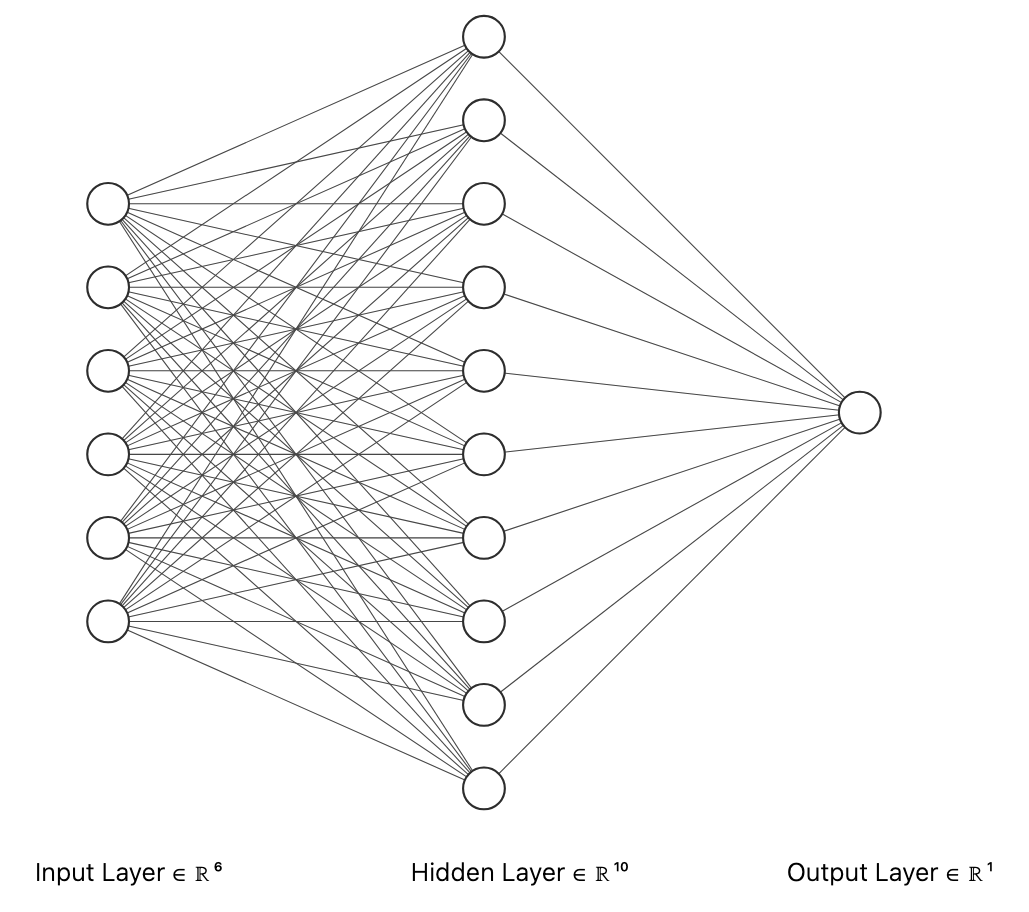

Hàm `nn_model` trong cell này triển khai một mô hình mạng neural hai lớp với kích thước batch và số lượng epochs sử dụng các functions mà chúng ta đã tạo. Dưới đây là giải thích chi tiết về từng phần của hàm:

### Quy Trình

1. **Khởi Tạo**

   - **Khởi tạo Tham Số**:
     - `np.random.seed(2)`: Đảm bảo rằng kết quả là có thể lặp lại.
     - `n_x` và `m`: Số lượng đặc trưng và ví dụ từ dữ liệu đầu vào.
     - Đảm bảo `Y` là một vector cột với kích thước `(1, m)`.

   - **Khởi Tạo Tham Số Của Mạng**:
     - `parameters['layer1']`: Khởi tạo tham số cho lớp ẩn đầu tiên với kích thước `(n_x, n_h)`.
     - `parameters['layer2']`: Khởi tạo tham số cho lớp đầu ra với kích thước `(n_h, 1)`.

2. **Vòng Lặp Epoch**

   - **Tính Toán Số Lượng Batch**:
     - `num_batches` tính số lượng batch cần thiết dựa trên kích thước của dữ liệu và kích thước batch.

   - **Vòng Lặp Mini-Batch**:
     - **Tách Dữ Liệu Thành Batch**:
       - Xác định phạm vi của mỗi mini-batch bằng `start` và `end`.
       - Tách dữ liệu đầu vào (`X_batch`) và nhãn (`Y_batch`) cho mỗi mini-batch.

     - **Lan Truyền Xuôi**:
       - `A1, cache1 = forward_propagation(X_batch.T, parameters['layer1'], 'relu')`: Lan truyền qua lớp ẩn với hàm kích hoạt ReLU.
       - `A2, cache2 = forward_propagation(A1, parameters['layer2'], 'linear')`: Lan truyền qua lớp đầu ra với hàm kích hoạt Linear.

     - **Tính Độ Mất Mát**:
       - `batch_cost = compute_cost(A2, Y_batch)`: Tính toán độ mất mát cho batch hiện tại.
       - Cập nhật `epoch_cost` với giá trị mất mát trung bình của tất cả các batch.

     - **Lan Truyền Ngược**:
       - `dA2 = -(Y_batch - A2)`: Tính toán gradient của đầu ra.
       - `dA1, dW2, db2 = backward_propagation(dA2, cache2, 'linear')`: Tính toán gradient cho lớp đầu ra.
       - `_, dW1, db1 = backward_propagation(dA1, cache1, 'relu')`: Tính toán gradient cho lớp ẩn.

     - **Cập Nhật Tham Số**:
       - Tạo dictionary `grads` chứa các gradient.
       - Cập nhật các tham số của lớp ẩn và lớp đầu ra bằng cách sử dụng hàm `update_parameters` với tốc độ học `learning_rate`.

3. **In Độ Mất Mát**

   - Nếu `print_cost` là `True`, in ra độ mất mát mỗi epoch để theo dõi quá trình huấn luyện.

Hàm `nn_model` giúp chúng ta huấn luyện một mô hình mạng neural hai lớp với sự kiểm soát kích thước batch và số lượng epochs, đồng thời theo dõi độ mất mát trong quá trình huấn luyện.

In [37]:
# Mô hình mạng neural hai lớp với kích thước batch và epochs
def nn_model(X, Y, n_h, learning_rate=0.00001, num_epochs=100, batch_size=32, print_cost=False):
    """
    Triển khai một mạng neural hai lớp: LINEAR->RELU->LINEAR->MSE.

    Tham số:
    X -- dữ liệu đầu vào có dạng (số lượng ví dụ, số lượng đặc trưng)
    Y -- vector nhãn "thật" có dạng (số lượng ví dụ,)
    n_h -- kích thước của lớp ẩn
    learning_rate -- tốc độ học của quy tắc cập nhật gradient descent
    num_epochs -- số lượng lượt qua tập huấn luyện
    batch_size -- kích thước của mini-batch
    print_cost -- nếu True, in ra chi phí mỗi epoch

    Trả về:
    parameters -- các tham số học được bởi mô hình. Chúng có thể được sử dụng để dự đoán.
    """
    np.random.seed(2)
    n_x = X.shape[1]  # Số lượng đặc trưng
    m = X.shape[0]  # Số lượng ví dụ

    # Đảm bảo Y là một vector cột
    Y = Y.reshape(1, m)

    # Khởi tạo tham số
    parameters = {}
    parameters['layer1'] = initialize_parameters(n_x, n_h)
    parameters['layer2'] = initialize_parameters(n_h, 1)  # 1 đơn vị đầu ra cho hồi quy

    # Vòng lặp epoch
    for epoch in range(num_epochs):
        epoch_cost = 0
        num_batches = int(m / batch_size)

        # Vòng lặp mini-batch
        for batch in range(num_batches):
            start = batch * batch_size
            end = min(start + batch_size, m)
            X_batch = X[start:end, :]
            Y_batch = Y[:, start:end]

            # Lan truyền xuôi
            A1, cache1 = forward_propagation(X_batch.T, parameters['layer1'], 'relu')
            A2, cache2 = forward_propagation(A1, parameters['layer2'], 'linear')

            # Tính độ mất mát
            batch_cost = compute_cost(A2, Y_batch)
            epoch_cost += batch_cost / num_batches

            # Lan truyền ngược
            dA2 = -(Y_batch - A2)
            dA1, dW2, db2 = backward_propagation(dA2, cache2, 'linear')
            _, dW1, db1 = backward_propagation(dA1, cache1, 'relu')

            # Cập nhật tham số
            grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
            parameters['layer1'] = update_parameters(parameters['layer1'], {"dW": dW1, "db": db1}, learning_rate)
            parameters['layer2'] = update_parameters(parameters['layer2'], {"dW": dW2, "db": db2}, learning_rate)

        # In độ mất mát mỗi epoch
        if print_cost and epoch % 1 == 0:
            print("Độ mất mát của epoch {}: {}".format(epoch+1, epoch_cost))

    return parameters

In [39]:
# Huấn luyện mô hình với số neuron cho hidden layer, số lượng epochs và batch
parameters = nn_model(X_train, y_train, n_h=10, num_epochs=100, batch_size=32, print_cost=True)

Độ mất mát của epoch 1: 8864800.761239426
Độ mất mát của epoch 2: 6627.9968895597685
Độ mất mát của epoch 3: 6557.268498892819
Độ mất mát của epoch 4: 6488.824969167539
Độ mất mát của epoch 5: 6422.591982556768
Độ mất mát của epoch 6: 6358.489425091029
Độ mất mát của epoch 7: 5987.515683176053
Độ mất mát của epoch 8: 6242.105131501079
Độ mất mát của epoch 9: 6183.843448506434
Độ mất mát của epoch 10: 6127.46397026408
Độ mất mát của epoch 11: 6072.905889436216
Độ mất mát của epoch 12: 6020.110363165885
Độ mất mát của epoch 13: 5969.020449610991
Độ mất mát của epoch 14: 5919.58106790473
Độ mất mát của epoch 15: 5871.738888088895
Độ mất mát của epoch 16: 5825.442294061212
Độ mất mát của epoch 17: 5780.641353582948
Độ mất mát của epoch 18: 5737.287747554547
Độ mất mát của epoch 19: 5695.334717900604
Độ mất mát của epoch 20: 5654.737017138319
Độ mất mát của epoch 21: 5615.450859575222
Độ mất mát của epoch 22: 5577.433874083642
Độ mất mát của epoch 23: 5540.645058400842
Độ mất mát của epoch 

Sau đó, ta sẽ dùng các thông số đã được huấn luyện để dự đoán `y_test` dựa trên `X_test`.

In [40]:
# Hàm để dự đoán
def predict(X, parameters):
    """
    Thực hiện dự đoán sử dụng các tham số đã được huấn luyện.

    Tham số:
    X -- dữ liệu đầu vào có kích thước (số lượng ví dụ, số lượng đặc trưng)
    parameters -- dictionary chứa các tham số đã được huấn luyện

    Trả về:
    predictions -- vector dự đoán
    """
    A1, _ = forward_propagation(X.T, parameters['layer1'], activation='relu')
    predictions, _ = forward_propagation(A1, parameters['layer2'], activation='linear')
    return predictions

Dựa vào các kết quả dự đoán, chúng ta sẽ đánh giá mô hình dựa vào hàm mất mát MSE.

In [41]:
# Dự đoán giá trị dựa trên X_test và thông số đã được huấn luyện
predictions = predict(X_test, parameters)

# Đánh giá mô hình
mse = compute_cost(predictions, y_test.reshape(1, -1))  # Đổi kích thước y_test để đồng nhất
print("Mean Squared Error trên tệp Test:", mse)

Mean Squared Error trên tệp Test: 2913.4803585880977


Cuối cùng, để có cái nhìn trực quan hơn về kết quả, chúng ta sẽ in biểu đồ so sánh kết quả thực tế và kết quả dự đoán.

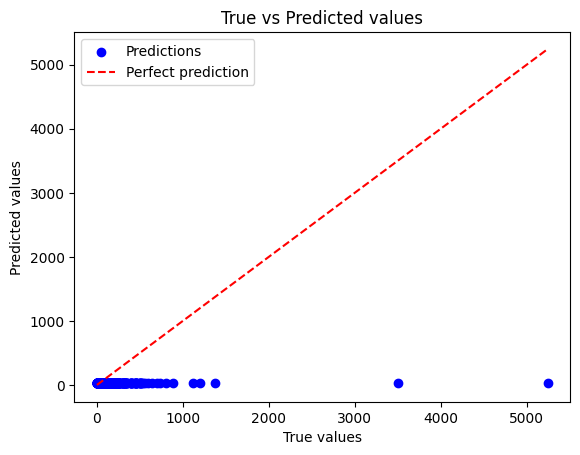

In [42]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect prediction')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted values')
plt.legend()
plt.show()

#Thử với data trong dataset

Đầu tiên, ta sẽ lấy 1 data trong X_test và in ra thông tin trong đó.

In [43]:
x_demo = X_test[0].reshape((1, -1))
print(x_demo)

[[ 17  18   2   6  38 151]]


Để chuyển đổi data về giá trị ban đầu, ta cần:

*   Trung bình bằng 0 và độ lệch chuẩn bằng 1
*   LabelEncoder từ thư viện sklearn.preprocessing để chuyển đổi các giá trị trong các cột 'Đường', 'Quận', 'Huyện', và 'Loại hình nhà ở' từ dạng số sang dạng chuỗi.

Đầu tiên, ta cần tải các encoder đã được tạo sẵn (tuần 3) sử dụng thư viện joblib.

In [44]:
# Convert categorical features back to original values
quan = quan_label_encoder.inverse_transform([int(x_demo[0][0])])[0]
huyen = huyen_label_encoder.inverse_transform([int(x_demo[0][1])])[0]
loai_hinh_nha_o = loai_hinh_nha_o_label_encoder.inverse_transform([int(x_demo[0][2])])[0]
duong = duong_label_encoder.inverse_transform([int(x_demo[0][5])])[0]
so_phong_ngu = int(x_demo[0][3])
dien_tich = int(x_demo[0][4])

print({'đường': duong, 'quận': quan, 'huyện': huyen, 'loại hình nhà ở': loai_hinh_nha_o, 'số phòng ngủ': so_phong_ngu, 'diện tích': dien_tich})

{'đường': 'cầu giấy', 'quận': 'Quận Cầu Giấy', 'huyện': 'Phường Dịch Vọng', 'loại hình nhà ở': 'Nhà ngõ, hẻm', 'số phòng ngủ': 6, 'diện tích': 38}


Cuối cùng, xem giá nhà dự đoán ở vị trí X_train[0].

In [45]:
demo_prediction = predict(x_demo, parameters)
print(f"Giá nhà dự đoán {demo_prediction}")
print(f"Giá nhà thực tế {y_test[0]}")

Giá nhà dự đoán [[38.1269246]]
Giá nhà thực tế 38


# Thử với data của bạn

Đầu tiên, ta cần nhập vào input và mã hóa các thông tin của đường, quận, huyện, loại hình nhà ở. Ta sẽ sử dụng LabelEncoder để chuyển hóa dữ liệu từ số sang chữ (giải thích kĩ ở tuần 3).

Lưu ý:
* Chỉ nhập tên đường, không bắt đầu bằng "đường" hoặc "phố".
* Đối với data không được train, cell này sẽ xảy ra lỗi.

In [46]:
duong = 'minh khai'
quan = 'Quận Hai Bà Trưng'
huyen = 'Phường Minh Khai'
loai = 'Nhà mặt phố, mặt tiền'
so_phong = 6
dien_tich = 50

# Chuyển đổi cột 'Địa chỉ'
duong = duong_label_encoder.transform([duong])[0]

# Chuyển đổi cột 'Quận'
quan = quan_label_encoder.transform([quan])[0]

# Chuyển đổi cột 'Huyện'
huyen = huyen_label_encoder.transform([huyen])[0]

# Chuyển đổi cột 'Loại hình nhà ở'
loai = loai_hinh_nha_o_label_encoder.transform([loai])[0]

Sau đó, chúng ta chuẩn hóa x cho chúng có trung bình bằng 0 và độ lệch chuẩn bằng 1. (giải thích kĩ ở tuần 3)

In [47]:
input = [[quan, huyen, loai, so_phong, dien_tich, duong]]
input = np.array(input)
print(input)

[[ 18  58   1   6  50 529]]


Cuối cùng, xem giá nhà dự đoán của bạn.

In [48]:
input_prediction = predict(input, parameters)
print(input_prediction)

[[38.1269246]]
